In [1]:
 # importing all the necessary libraries

import numpy as np
import cv2

from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris
# This will return the dictionary which contains a bunch of different feilds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
dir(iris) # Here, all the data points are contained in 'data'. There are 150 data points, each of which have four feature values:

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.feature_names  #These are the feature values

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target.shape

(150,)

In [8]:
np.unique(iris.target) # We can also inspect the class labels, and find that there is a total of three classes:

array([0, 1, 2])

In [9]:
# For the sake of simplicity, we want to focus on a binary classification problem for now, where we only have two classes.
# The easiest way to do this is to discard all data points belonging to a certain class, such as class label 2, by selecting all
# the rows that do not belong to class 2:

idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

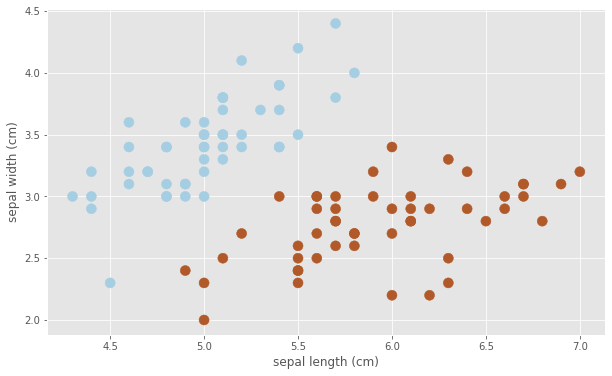

In [10]:
# Using Matplotlib, we create a scatter plot where the color of each data point corresponds to the class label.

# To make plotting easier, we limit ourselves to the first two features (iris.feature_names[0] being the sepal length and 
# iris.feature_names[1] being the sepal width). We can see a nice separation of classes in the following figure:

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [11]:
# Splitting our data set into training and testing
# assigning the test size as given(10 percent for training and rest for testing)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.1, random_state=42
)


## Here we want to split the data into 90 percent training data and 10 percent test data, which we specify with test_size=0.1. By inspecting the return arguments, we note that we ended up with exactly 90 training data points and 10 test data points:

In [12]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [13]:
X_test.shape, y_test.shape

((10, 4), (10,))

In [14]:
# training the classifier
lr = cv2.ml.LogisticRegression_create()

In [15]:
# We then have to specify the desired training method. Here, we can choose cv2.ml.LogisticRegression_BATCH or 
# cv2.ml.LogisticRegression_MINI_BATCH. For now, all we need to know is that we want to update the model after every data point,
# which can be achieved with the following code:

lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

In [16]:
lr.setIterations(100)

In [17]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train);

In [18]:
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

In [19]:
# Testing the classifier
ret, y_pred = lr.predict(X_train)

In [20]:
metrics.accuracy_score(y_train, y_pred)

1.0

## Perfect score! However, this only means that the model was able to perfectly memorize the training dataset. This does not mean that the model would be able to classify a new, unseen data point. For this, we need to check the test dataset:

In [21]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [ ]:
# Luckily, we get another perfect score! 